In [31]:
import json
import umap
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

pca = PCA(n_components=2)

In [13]:
with open("./activation_results/llama31_8b_instruct_contrasting_power_over_results.json") as json_data:
    data = json.load(json_data)
len(data["samples"])

504

In [14]:
yes_no_labels = [s["top_tokens"][0]["word"] for s in data["samples"]]
yes_no_answer_labels = []
for l in yes_no_labels:
    if l == "YES":
        yes_no_answer_labels.append(1)
    elif l == "NO":
        yes_no_answer_labels.append(0)
    else:
        yes_no_answer_labels.append(-1)

print(yes_no_answer_labels)

[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 

100%|██████████| 32/32 [00:07<00:00,  4.42it/s]


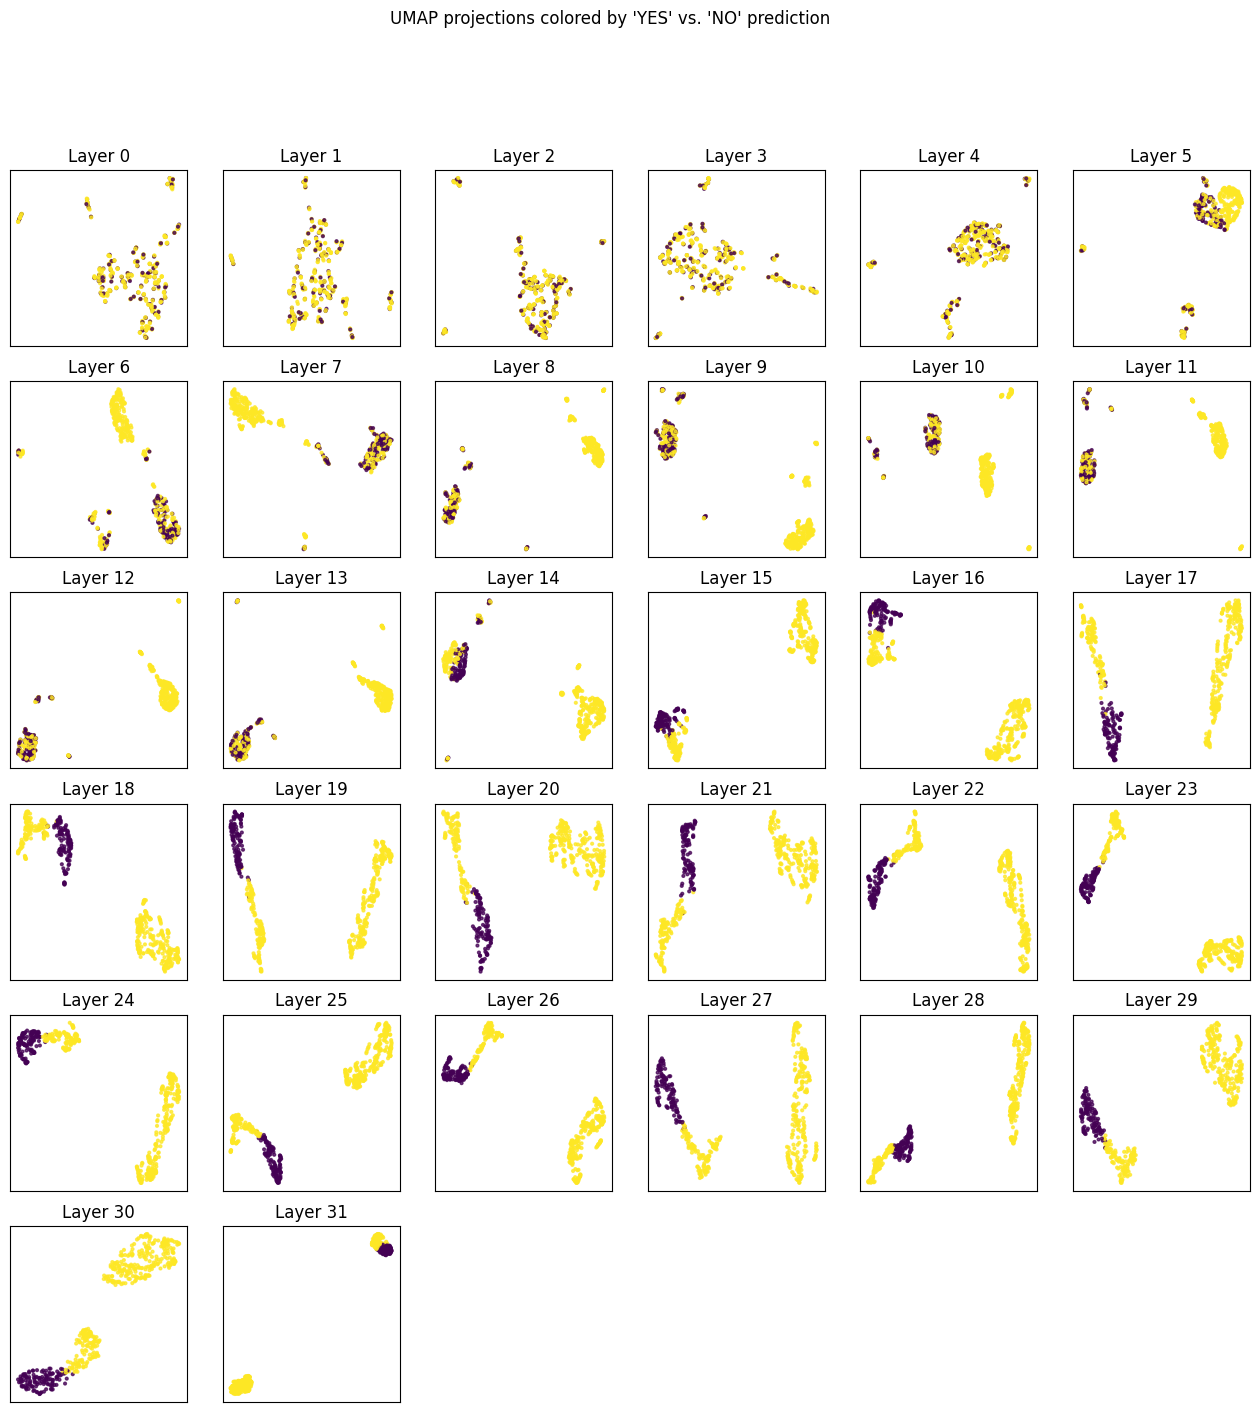

  0%|          | 0/32 [00:00<?, ?it/s]/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normal

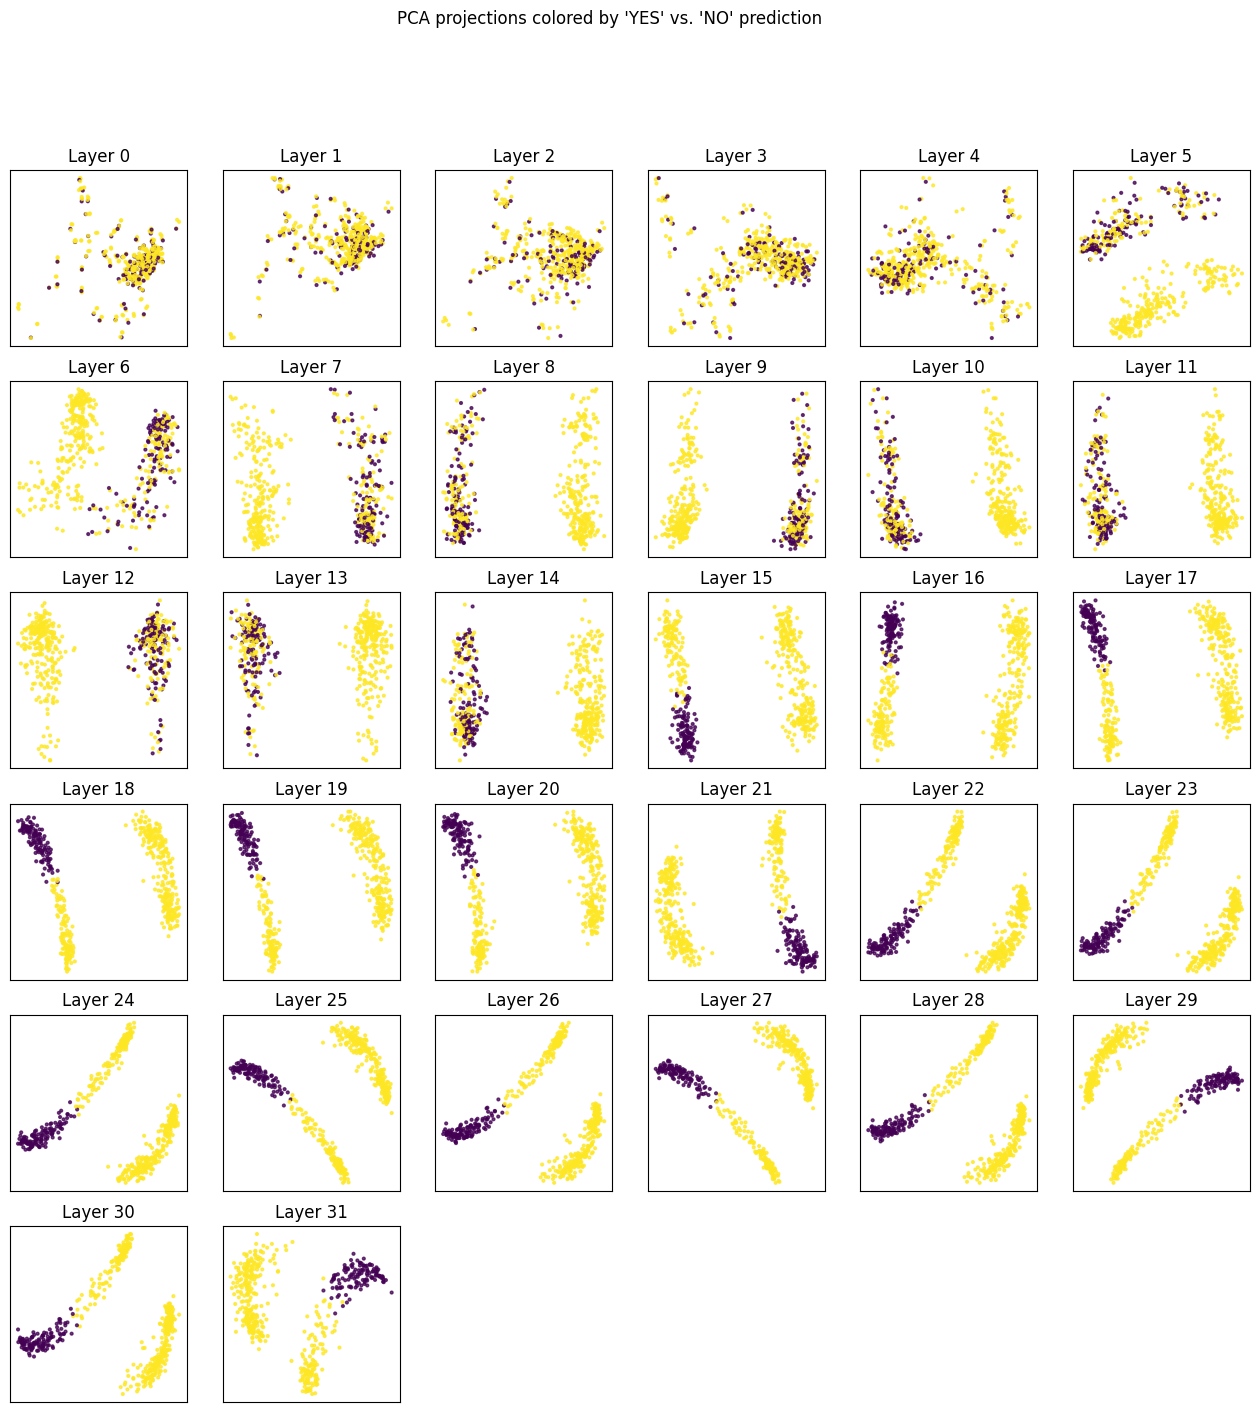

In [73]:
fig, axs = plt.subplots(6, 6, figsize=(16, 16))
axs = axs.flatten()
umap_fn = umap.UMAP()
for layer in tqdm(range(32)):
    if layer < 10:
        fname = f"./activation_results/llama31_8b_instruct_contrasting_power_over_layer0{layer}.npy"
    else:
        fname = f"./activation_results/llama31_8b_instruct_contrasting_power_over_layer{layer}.npy"
    layer_vals = np.load(fname)
    layer_proj = umap_fn.fit_transform(layer_vals)
    axs[layer].scatter(layer_proj[:, 0], layer_proj[:, 1], c=yes_no_answer_labels, s=4, alpha=0.75)
    axs[layer].set_xticks([])
    axs[layer].set_yticks([])
    axs[layer].set_title(f"Layer {layer}")
for i in range(32, 36):
    axs[i].set_axis_off()
fig.suptitle("UMAP projections colored by 'YES' vs. 'NO' prediction")
plt.show()

fig, axs = plt.subplots(6, 6, figsize=(16, 16))
axs = axs.flatten()
umap_fn = umap.UMAP()
all_layer_pca_projs = np.zeros((32, len(yes_no_answer_labels), 2))
for layer in tqdm(range(32)):
    if layer < 10:
        fname = f"./activation_results/llama31_8b_instruct_contrasting_power_over_layer0{layer}.npy"
    else:
        fname = f"./activation_results/llama31_8b_instruct_contrasting_power_over_layer{layer}.npy"
    layer_vals = np.load(fname)
    layer_proj = pca.fit_transform(layer_vals)
    all_layer_pca_projs[layer] = layer_proj
    axs[layer].scatter(layer_proj[:, 0], layer_proj[:, 1], c=yes_no_answer_labels, s=4, alpha=0.75)
    axs[layer].set_xticks([])
    axs[layer].set_yticks([])
    axs[layer].set_title(f"Layer {layer}")
for i in range(32, 36):
    axs[i].set_axis_off()
fig.suptitle("PCA projections colored by 'YES' vs. 'NO' prediction")
plt.show()

[0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0
 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1
 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0
 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1
 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0
 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1
 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1
 0 0 0 0 0 0 1 0 1 1 1 1 

100%|██████████| 32/32 [00:09<00:00,  3.27it/s]


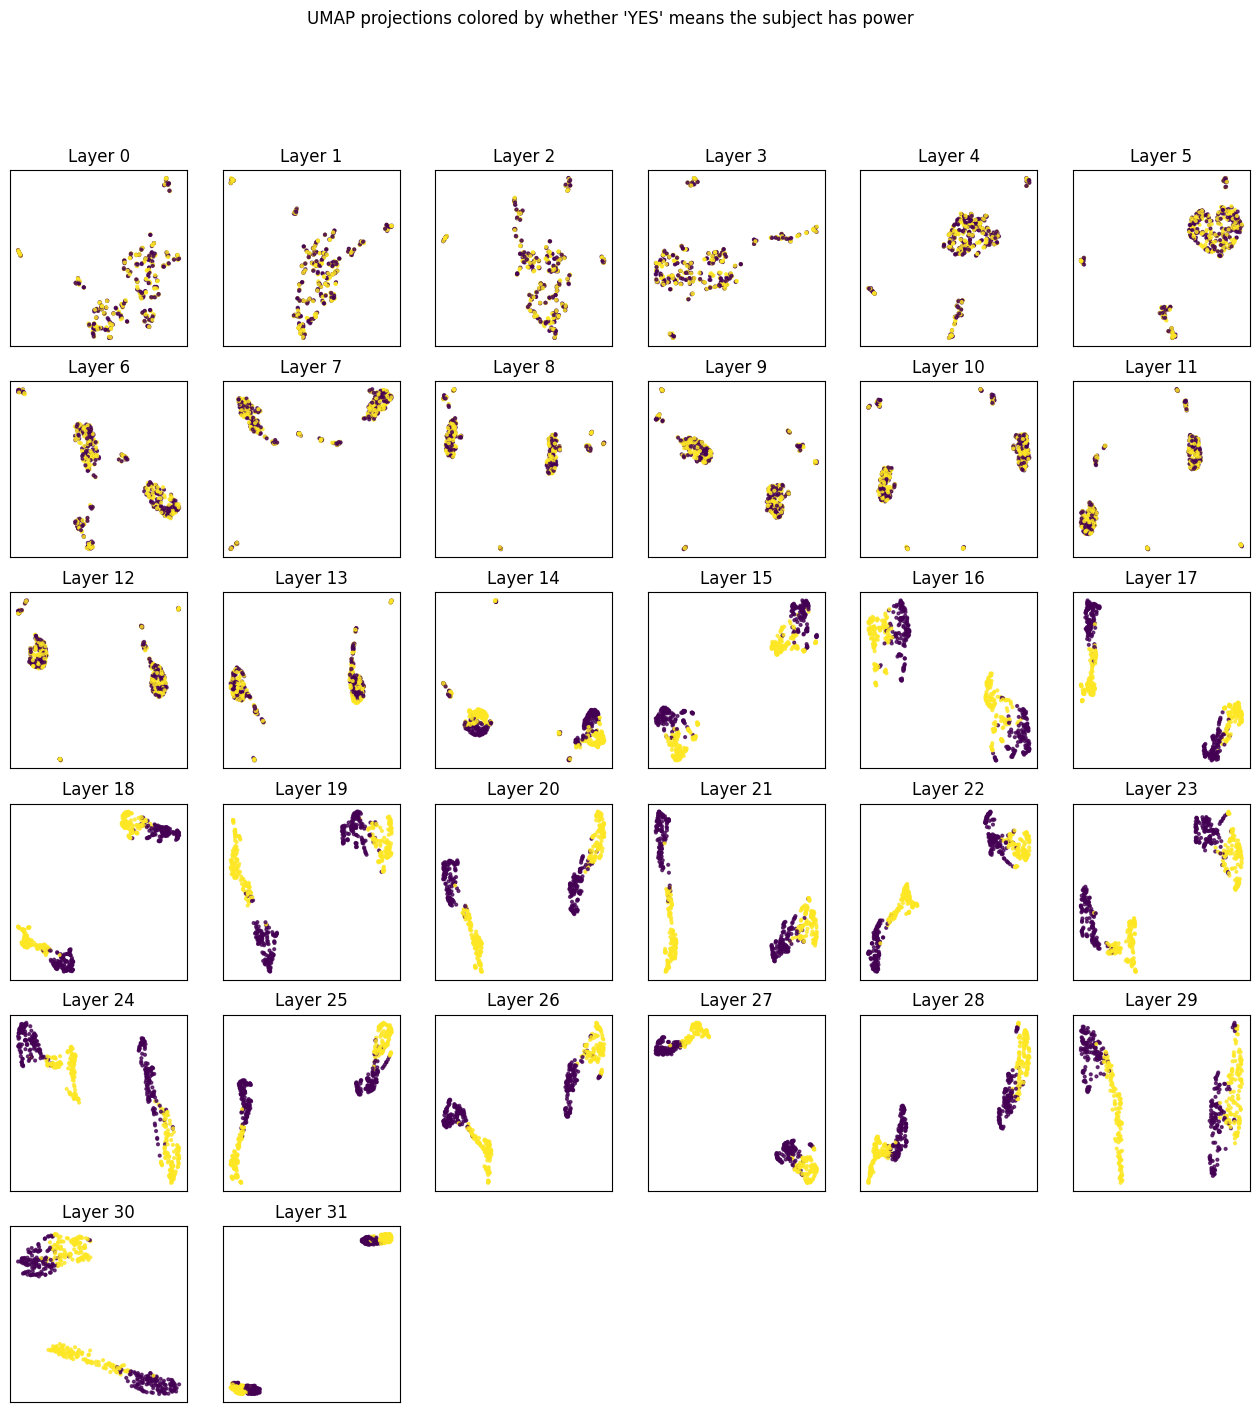

  0%|          | 0/32 [00:00<?, ?it/s]/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normal

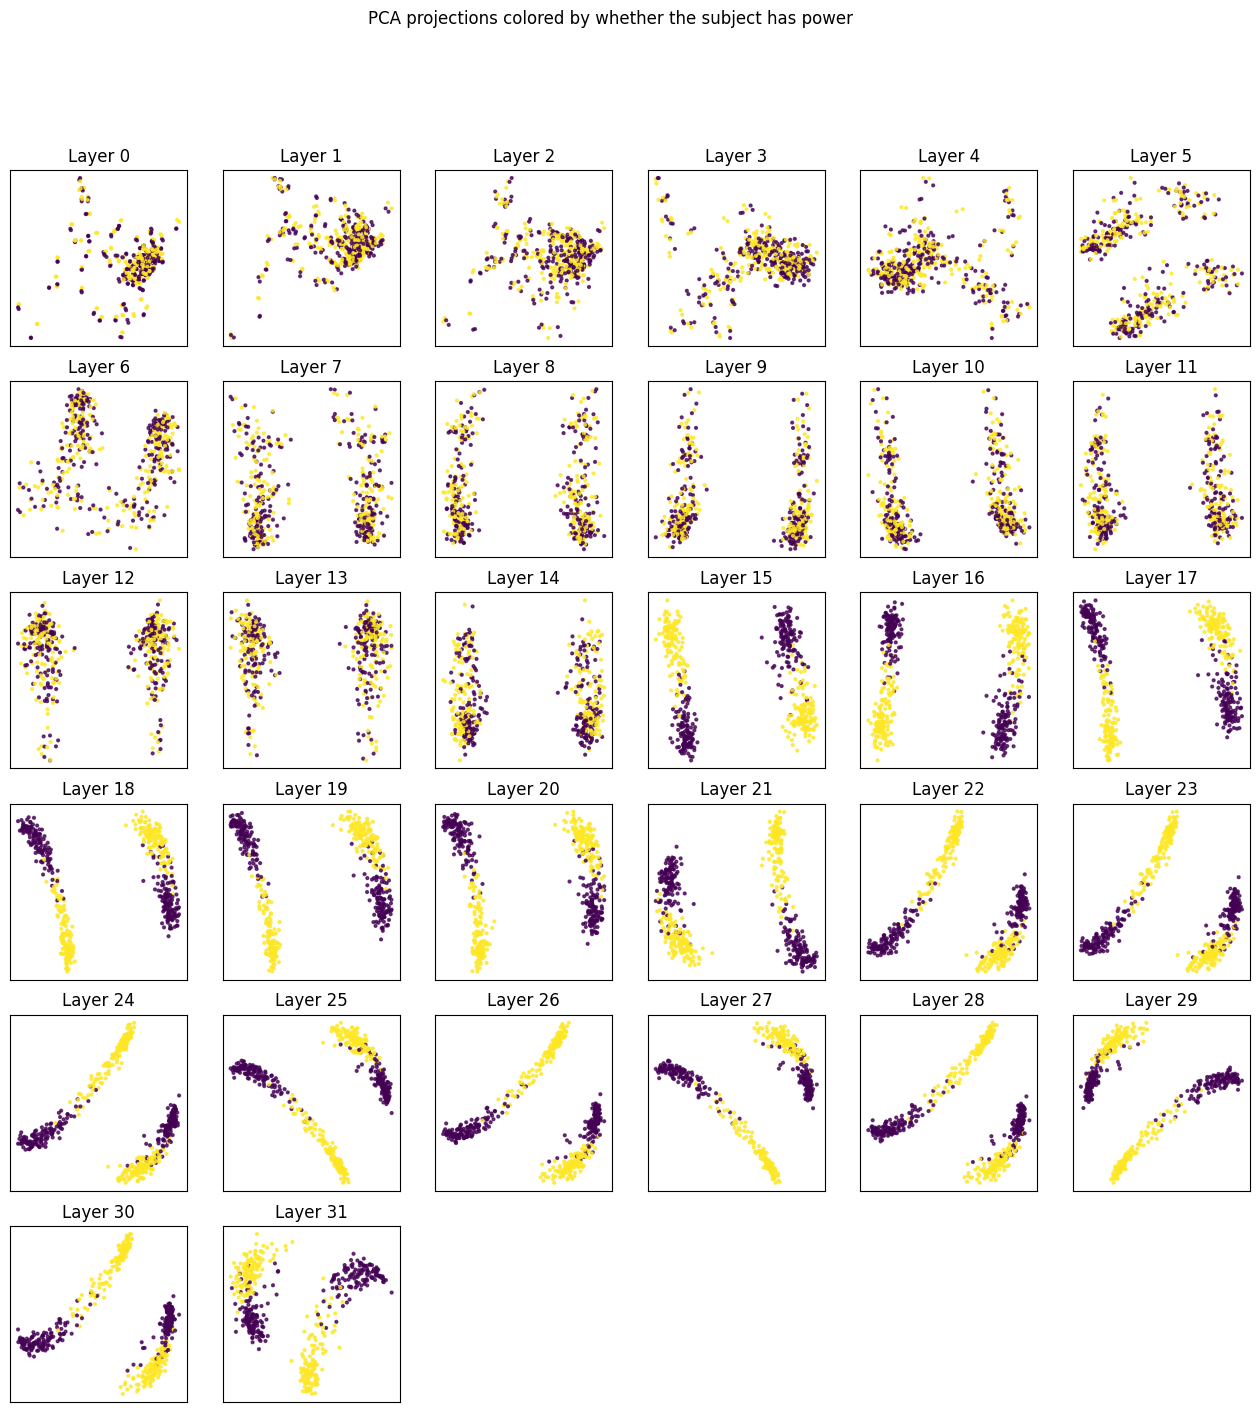

In [3]:
with open("./contrasting_power_over_power_labels.txt", "r") as power_labels_file:
    power_labels = np.array(power_labels_file.read().split("\t"), dtype=int)

# 1 if the subject has power and 0 otherwise
print(power_labels)

fig, axs = plt.subplots(6, 6, figsize=(16, 16))
axs = axs.flatten()
umap_fn = umap.UMAP()
for layer in tqdm(range(32)):
    if layer < 10:
        fname = f"./activation_results/llama31_8b_instruct_contrasting_power_over_layer0{layer}.npy"
    else:
        fname = f"./activation_results/llama31_8b_instruct_contrasting_power_over_layer{layer}.npy"
    layer_vals = np.load(fname)
    layer_proj = umap_fn.fit_transform(layer_vals)
    axs[layer].scatter(layer_proj[:, 0], layer_proj[:, 1], c=power_labels, s=4, alpha=0.75, cmap="viridis_r")
    axs[layer].set_xticks([])
    axs[layer].set_yticks([])
    axs[layer].set_title(f"Layer {layer}")
for i in range(32, 36):
    axs[i].set_axis_off()
fig.suptitle("UMAP projections colored by whether 'YES' means the subject has power")
plt.show()

fig, axs = plt.subplots(6, 6, figsize=(16, 16))
axs = axs.flatten()
umap_fn = umap.UMAP()
for layer in tqdm(range(32)):
    if layer < 10:
        fname = f"./activation_results/llama31_8b_instruct_contrasting_power_over_layer0{layer}.npy"
    else:
        fname = f"./activation_results/llama31_8b_instruct_contrasting_power_over_layer{layer}.npy"
    layer_vals = np.load(fname)
    layer_proj = pca.fit_transform(layer_vals)
    axs[layer].scatter(layer_proj[:, 0], layer_proj[:, 1], c=power_labels, s=4, alpha=0.75, cmap="viridis_r")
    axs[layer].set_xticks([])
    axs[layer].set_yticks([])
    axs[layer].set_title(f"Layer {layer}")
for i in range(32, 36):
    axs[i].set_axis_off()
fig.suptitle("PCA projections colored by whether the subject has power")
plt.show()

In [81]:
# Train linear probes over all activations
layer_prompt_activations = np.empty((len(power_labels), 32, 4096))
for i, layer in tqdm(enumerate(range(32))):
    if layer < 10:
        fname = f"./activation_results/llama31_8b_instruct_contrasting_power_over_layer0{layer}.npy"
    else:
        fname = f"./activation_results/llama31_8b_instruct_contrasting_power_over_layer{layer}.npy"
    layer_prompt_activations[:, i, :] = np.load(fname)

flattened_prompt_activations = layer_prompt_activations.reshape(len(power_labels), -1)
all_layer_reg_power = LinearRegression().fit(flattened_prompt_activations[:300], power_labels[:300])
all_layer_reg_yes_no = LinearRegression().fit(flattened_prompt_activations[:300], yes_no_answer_labels[:300])
print(all_layer_reg_power.score(flattened_prompt_activations[300:], power_labels[300:]))
print(all_layer_reg_yes_no.score(flattened_prompt_activations[300:], yes_no_answer_labels[300:]))

32it [00:00, 215.83it/s]
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_


0.8533198148708567
0.8902432866763833


/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarn

0it [00:00, ?it/s]/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_m

0==============================
160
141
1==============================
147
153
2==============================
164
156
3==============================


/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarn

161
152
4==============================
179
159
5==============================
174
157
6==============================
179
172
7==============================


/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarn

179
177
8==============================
185
186
9==============================
185
193
10==============================
193
189
11==============================


/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarn

193
190
12==============================
193
194
13==============================
199
196
14==============================
202
202
15==============================


/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarn

203
200
16==============================
202
202
17==============================
202
201
18==============================
202
203
19==============================


/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarn

203
202
20==============================
201
202
21==============================
202
203
22==============================
202
203
23==============================


/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarn

202
203
24==============================
201
203
25==============================
200
203
26==============================
199
202
27==============================


/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarn

201
201
28==============================
200
202
29==============================
201
201
30==============================
199
202
31==============================


/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:312: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/main/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarn

201
202


Text(0.5, 1.0, 'Layer-wise linear probe (300 prompt activations train set, 204 test)')

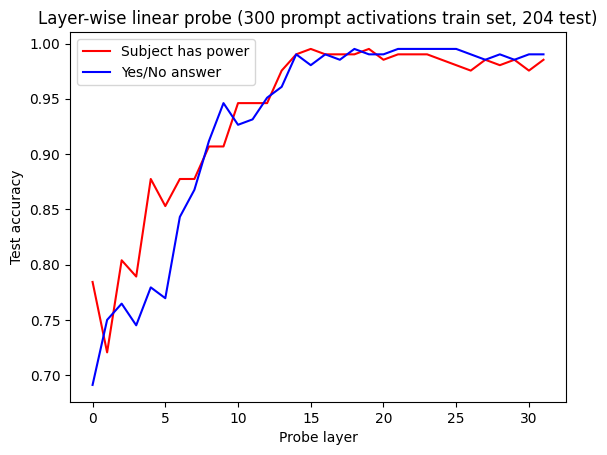

In [105]:
# Train linear probes over layerwise activations
layer_yes_no_r2s = []
layer_power_r2s = []
layer_yes_no_accs = []
layer_power_accs = []
for i, layer in tqdm(enumerate(range(32))):
    print(str(i) + "=" * 30)
    cur_layer_reg_power = LinearRegression().fit(layer_prompt_activations[:300, i, :], power_labels[:300])
    cur_layer_reg_yes_no = LinearRegression().fit(layer_prompt_activations[:300, i, :], yes_no_answer_labels[:300])
    #layer_power_r2s.append(cur_layer_reg_power.score(layer_prompt_activations[300:, i, :], power_labels[300:]))
    #layer_yes_no_r2s.append(cur_layer_reg_yes_no.score(layer_prompt_activations[300:, i, :], yes_no_answer_labels[300:]))
    cur_layer_power_preds = cur_layer_reg_power.predict(layer_prompt_activations[300:, i, :])
    cur_layer_yes_no_preds = cur_layer_reg_yes_no.predict(layer_prompt_activations[300:, i, :])
    cur_layer_power_preds = np.where(cur_layer_power_preds > 0.5, 1, 0)
    cur_layer_yes_no_preds = np.where(cur_layer_yes_no_preds > 0.5, 1, 0)
    layer_power_accs.append(np.sum(cur_layer_power_preds == power_labels[300:]) / len(power_labels[300:]))
    layer_yes_no_accs.append(np.sum(cur_layer_yes_no_preds == yes_no_answer_labels[300:]) / len(power_labels[300:]))

    print(np.sum(cur_layer_power_preds == power_labels[300:]))
    print(np.sum(cur_layer_yes_no_preds == yes_no_answer_labels[300:]))

plt.plot(list(range(32)), layer_power_accs, c="red", label="Subject has power")
plt.plot(list(range(32)), layer_yes_no_accs, c="blue", label="Yes/No answer")
plt.legend()
plt.ylabel("Test accuracy")
plt.xlabel("Probe layer")
plt.title("Layer-wise linear probe (300 prompt activations train set, 204 test)")

In [59]:
neuron_power_r2s = []
neuron_yes_no_r2s = []
neuron_power_pvals = []
neuron_yes_no_pvals = []
for i in tqdm(range(len(flattened_prompt_activations[0]))):
    neuron_power_corr = pearsonr(flattened_prompt_activations[:, i], power_labels)
    neuron_yes_no_corr = pearsonr(flattened_prompt_activations[:, i], yes_no_answer_labels)
    neuron_power_r2s.append(neuron_power_corr.statistic)
    neuron_yes_no_r2s.append(neuron_yes_no_corr.statistic)
    neuron_power_pvals.append(neuron_power_corr.pvalue)
    neuron_yes_no_pvals.append(neuron_yes_no_corr.pvalue)
neuron_power_r2s = np.array(neuron_power_r2s)
neuron_yes_no_r2s = np.array(neuron_yes_no_r2s)
neuron_power_pvals = np.array(neuron_power_pvals)
neuron_yes_no_pvals = np.array(neuron_yes_no_pvals)

100%|██████████| 131072/131072 [00:16<00:00, 7722.04it/s]


-0.789060241705476 -0.9299577717524836
0.7902547161008546 0.9308319680702388
7.576227770076993e-109 1.3197529591199277e-221
3.814697265625e-08


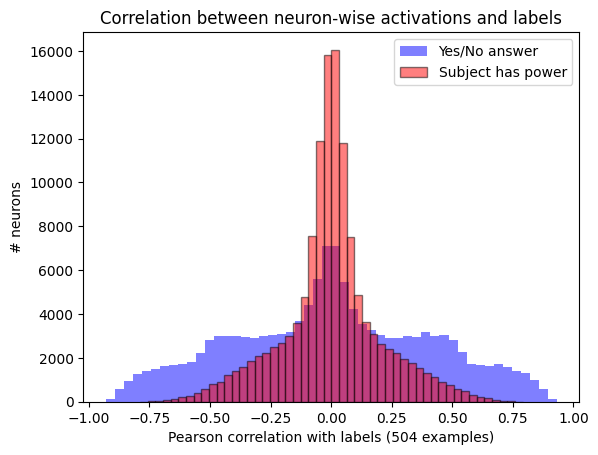

[ -0.49428648  -0.26359618  -0.15096935 ... -33.8898638   -1.0884219
 -20.57786359]


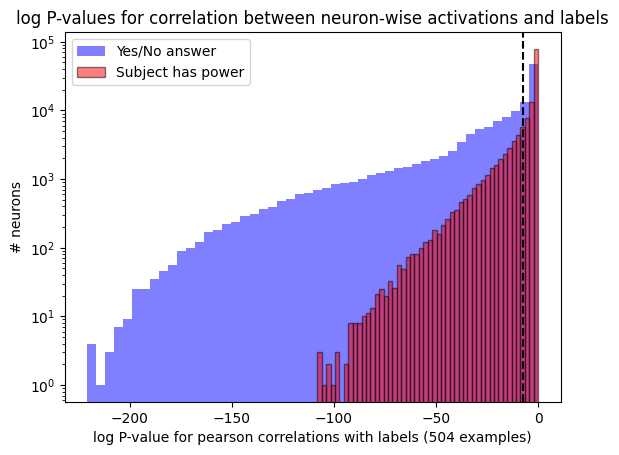

In [71]:
# Default pvalues for correlations
print(np.min(neuron_power_r2s), np.min(neuron_yes_no_r2s))
print(np.max(neuron_power_r2s), np.max(neuron_yes_no_r2s))
print(np.min(neuron_power_pvals), np.min(neuron_yes_no_pvals))
# (Bonferroni) corrected pvalue threshold to avoid multiple comparisons problems
print(0.005 / len(flattened_prompt_activations[0]))

plt.hist(neuron_yes_no_r2s, bins=50, color="blue", alpha=0.5, label="Yes/No answer")
plt.hist(neuron_power_r2s, bins=50, color="red", alpha=0.5, label="Subject has power", edgecolor="black")
plt.title("Correlation between neuron-wise activations and labels")
plt.ylabel("# neurons")
plt.xlabel("Pearson correlation with labels (504 examples)")
plt.legend()
plt.show()


print(np.log10(neuron_yes_no_pvals))
plt.hist(np.log10(neuron_yes_no_pvals), bins=50, color="blue", alpha=0.5, label="Yes/No answer")
plt.hist(np.log10(neuron_power_pvals), bins=50, color="red", alpha=0.5, label="Subject has power", edgecolor="black")
plt.title("log P-values for correlation between neuron-wise activations and labels")
plt.ylabel("# neurons")
plt.xlabel("log P-value for pearson correlations with labels (504 examples)")
plt.yscale("log")
plt.axvline(x=np.log10(0.005 / len(flattened_prompt_activations[0])), color="black", ls="--")
plt.legend()
plt.show()


[1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0
 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1
 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1
 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0
 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1
 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1
 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1
 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 0 1 1 0 0 1 0 1 1 

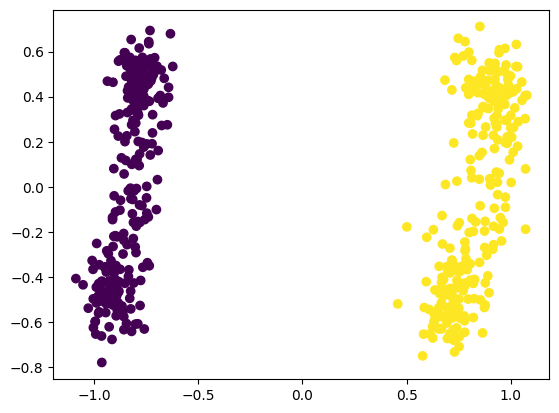

In [80]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(all_layer_pca_projs[16])
kmeans.labels_

plt.scatter(all_layer_pca_projs[16, :, 0], all_layer_pca_projs[16, :, 1], c=kmeans.labels_)

print(kmeans.labels_)